In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
import os
from statsmodels.tsa.stattools import adfuller

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
import re
from price_struct import *

from importlib import reload
import price_struct
reload(price_struct)
from price_struct import *
stock_files = os.listdir("./kdata60")
dfs = [pd.read_pickle(f"./kdata60/{i}") for i in stock_files]
amount_df = pd.concat([i["amount"] for i in dfs], axis=1)
amount_df.columns = [i[: -4] for i in stock_files]
close_df = pd.concat([i["close"] for i in dfs], axis=1)
close_df.columns = [i[: -4] for i in stock_files]
amt60 = amount_ts(amount_df)

In [5]:
amtd = amt60.end(["year", "month", "day"])
basic_info = pd.read_pickle("./stockdata/stocks_basic_info.pkl")
zs_info = basic_info[basic_info["type"] == '2']

cn_name = basic_info.set_index("code")["code_name"]
hs300 = comp(pd.read_pickle("./compdata/hs300.pkl"))

zs_files = [i for i in os.listdir("./kdata60zs") if '.pkl' in i]
close_zs = [pd.read_pickle(f"./kdata60zs/{i}")["close"] for i in zs_files]
close_zs_df = pd.concat(close_zs, axis=1)
close_zs_df.columns = [i[: -4] for i in zs_files]

check_price(close_df)
check_price(close_zs_df)
# 1. 对比PCA hs300-fit/total-fit 得到主特征的有效性
from decompse import factor

sp60 = price_ts(close_df)
ret60 = sp60.ret()
spd = sp60.end(["year", "month", "day"])
retd = spd.ret()
retd_df = retd.df_on()

zs_priced = price_ts(close_zs_df)
zs_retd = zs_priced.ret()
zs_retd_df = zs_retd.df_on()

sz.300085    1
dtype: int64
Series([], dtype: int64)


calendar_date
201301070    0.004575
201301080   -0.004210
201301090    0.000315
201301100    0.001757
201301110   -0.018884
               ...   
202211170   -0.004110
202211180   -0.004487
202211210   -0.008570
202211220    0.000118
202211230    0.001049
Name: sh.000300, Length: 2402, dtype: float64

In [9]:
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def ts_plot(data,lags=None,title=''):
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=(10,8))
        layout = (3,2)
        ts_ax = plt.subplot2grid(layout, (0,0))
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        qq_ax = plt.subplot2grid(layout, (2,0))
        pp_ax = plt.subplot2grid(layout, (2,1))
        data.plot(ax=ts_ax)
        ts_ax.set_title(title+'时序图')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
        acf_ax.set_title('自相关系数')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('偏自相关系数')
        sm.qqplot(data, line='s', ax=qq_ax)
        qq_ax.set_title('QQ 图')
        scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax)
        pp_ax.set_title('PP 图')
        plt.tight_layout()
    return



In [18]:
hs300_retd=pd.Series(zs_retd_df['sh.000300'].reset_index(drop=True))

C:\Users\48944\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


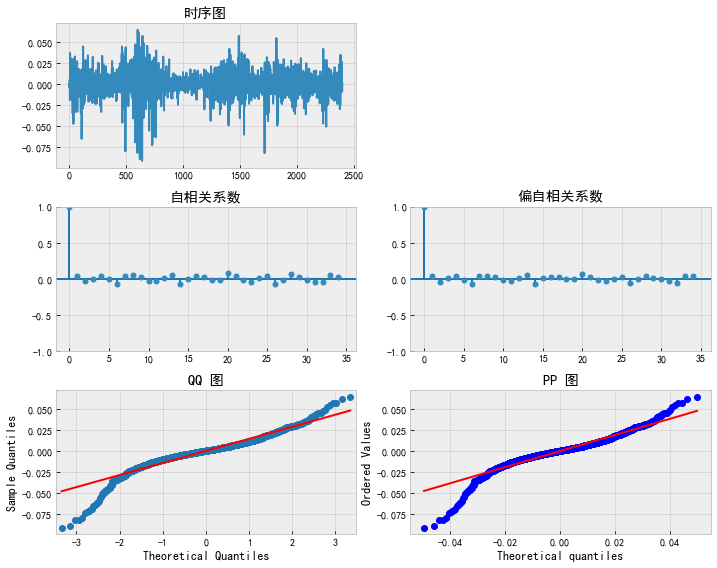

In [19]:
ts_plot(hs300_retd)

In [21]:
result = adfuller(hs300_retd, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.642978109234262
p-value: 5.3635869436098065e-14
Critial Values:
   1%, -3.433107533639768
Critial Values:
   5%, -2.8627582352958174
Critial Values:
   10%, -2.567418518633128
